# Business Understanding



## Wie (de opdrachtgever)? 

Appbakkers (Corné & Guido) is een bedrijf die (mobiele) applicaties ontwikkeld.  


## Wat (de opdracht)? 

Bij opname van een patiënt wordt er een elektrocardiogram (ECG) gemaakt. Hierbij worden alle elektrische impulsen in het hart geregistreerd, waardoor kan worden afgeleid welke gebieden van het hart naar behoren functioneren.  

Als een ECG is gemaakt, wordt het nu door een deskundige bekeken en gelabeld. Zo kan worden gezien of de patient een cardiovasculaire ziekte heeft. Nu kost dit labelen veel tijd en zijn er niet veel deskundigen die het accuraat kunnen labelen/onderzoeken. Om het labelen ervan makkelijker te maken is er een behoefte naar een model die de categorie kan bepalen aan de hand van een ECG.

<a id='categorieën'>De categorieën waarin deze ECG's zich kunnen bevinden:</a>

N - 0
* Normal
* Left/Right bundle branch block
* Atrial escape
* Nodal escape</br>

S - 1
* Atrial premature
* Aberrant atrial premature
* Nodal premature
* Supra-ventricular premature</br>

V - 2
* Premature ventricular contraction
* Ventricular escape</br>

F - 3
* Fusion of ventricular and normal</br>

Q - 4
* Paced
* Fusion of paced and normal
* Unclassifiable


## Wanneer (tijdsframe)? 

Deze opdracht voeren we uit vanaf 13 april ’22. Op deze dag hebben we de kennismaking gehad met onze opdrachtgever. Hierin hebben we de opdracht besproken en een aantal afspraken gemaakt. De einddatum van de opdracht zal zijn op 3 juni ’22. 

## Waarom (doel)? 

Het doel is om te achterhalen of hartslag een goede voorspeller kan zijn van de calciumscore. 

Als het model gemaakt is om dit te voorspellen kan deze verbeterd/uitgebreid worden met de resultaten en de calciumscore uitkomsten of de aanwezigheid van bradycardie/tachycardie/normale hartslag (en meer specifiek het aantal hartslagen per minuut) de calciumscore kan voorspellen.  

## Wat (wat gaan we gebruiken)? 

Door middel van Jupyter notebooks gaan wij het model ontwikkelen.  

# Data Understanding

Frequentie van de ECG's: 125Hz </br>
Data bron: Physionet's MIT-BIH Arrhythmia Dataset

### "mitbih_train.csv" en "mitbih_test.csv"

* Kolom 0 t/m 186          
    Een reeks aan voltages binnen een bereik van 0 tot 1, die één hartslag omvatten, **float** <br/>
* Kolom 187         
    [De categorie waarin deze bevind](#categorieën) , **integer**<br/>

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas_profiling as pp
import itertools

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix # this creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay


import tensorflow
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras import models

from keras.models import Model
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, Softmax, Add, Flatten, Activation
from keras.utils.vis_utils import plot_model
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

%matplotlib inline

In [18]:
ecg1_train = pd.read_csv('Data/ECG/mitbih_train.csv',delimiter=',', header=None)
ecg1_test = pd.read_csv('Data/ECG/mitbih_test.csv',delimiter=',', header=None)
ecg_data = pd.concat([ecg1_train, ecg1_test], axis=0)
ecg_data.shape

whole_ecg = pd.read_csv('Data/ECG/ecg.csv', delimiter='\t')
ecg_data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


### II Channel van de ECG

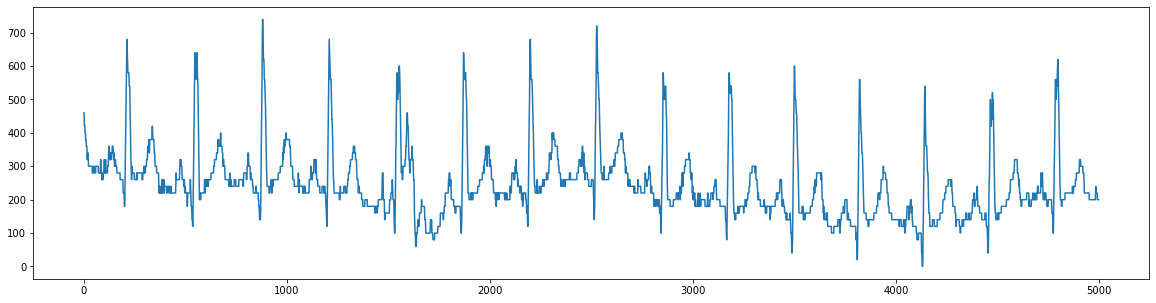

In [20]:
two = (whole_ecg['II']-whole_ecg['II'].min())
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(two)

## Value Distribution

In [188]:
ecg_data[187].value_counts()

0.0    90589
4.0     8039
2.0     7236
1.0     2779
3.0      803
Name: 187, dtype: int64

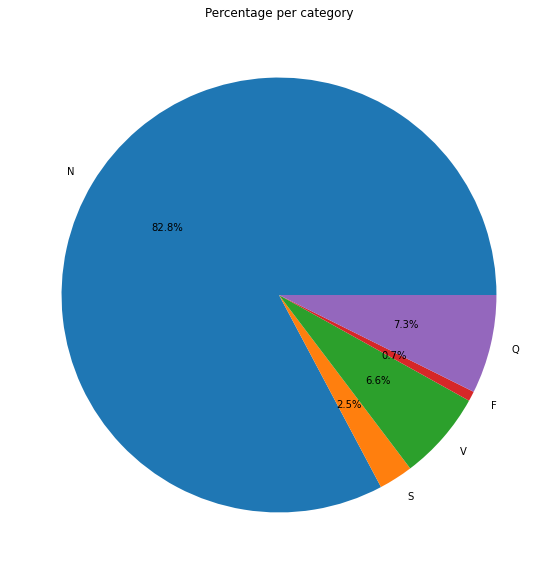

In [189]:
percentage = [x/len(ecg_data) for x in ecg_data[187].value_counts().sort_index()]
plt.rcParams["figure.figsize"] = (10,10)
fig = plt.pie(percentage, labels=['N','S','V','F','Q'], autopct='%1.1f%%', normalize=False)
plt.title('Percentage per category')
plt.show()

Zoals je kan zien, zijn de verschillende categorieën niet evenredig verdeeld. Om het model goed te kunnen trainen op alle categorieën, moeten we zo bij Data Preparation er voor zorgen dat elke categorie evenveel gerepresenteerd is in de data.

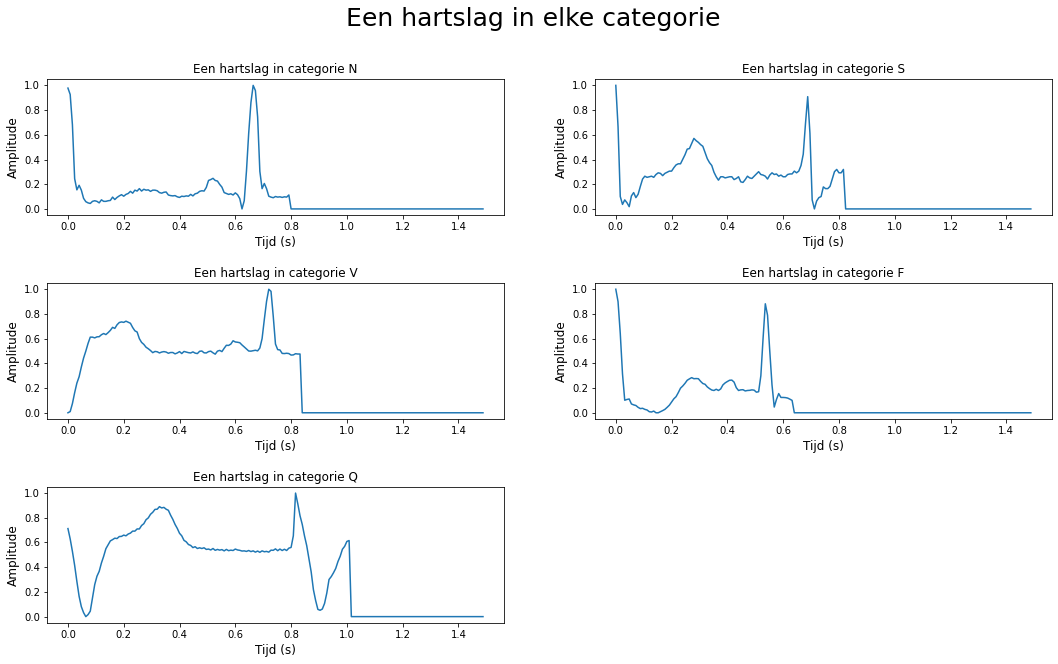

In [190]:
titles = ['N','S','V','F','Q']
fig, ax = plt.subplots(3, 2, figsize=(18,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
x_label = np.arange(0, 187)*8/1000
x = 0
y = 0
for i in range(0,5):
    if (x == 2):
        y += 1
        x = 0
    current_ax = ax[y,x]
    current_ax.plot(x_label,ecg_data[ecg_data[187] == i].iloc[0][:187])
    current_ax.set_title("Een hartslag in categorie " + titles[i])
    current_ax.set_ylabel("Amplitude", fontsize=12)
    current_ax.set_xlabel("Tijd (s)", fontsize=12)
    x += 1
fig.delaxes(ax[2,1])
fig.suptitle('Een hartslag in elke categorie', fontsize=25)
plt.show()

Text(0, 0.5, 'Amplitude')

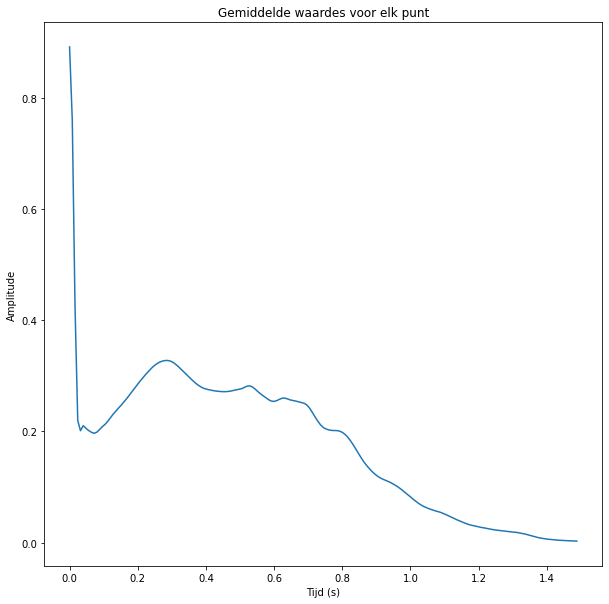

In [191]:
plt.plot(x_label,ecg_data.mean()[:187])
plt.title('Gemiddelde waardes voor elk punt')
plt.xlabel('Tijd (s)')
plt.ylabel('Amplitude')

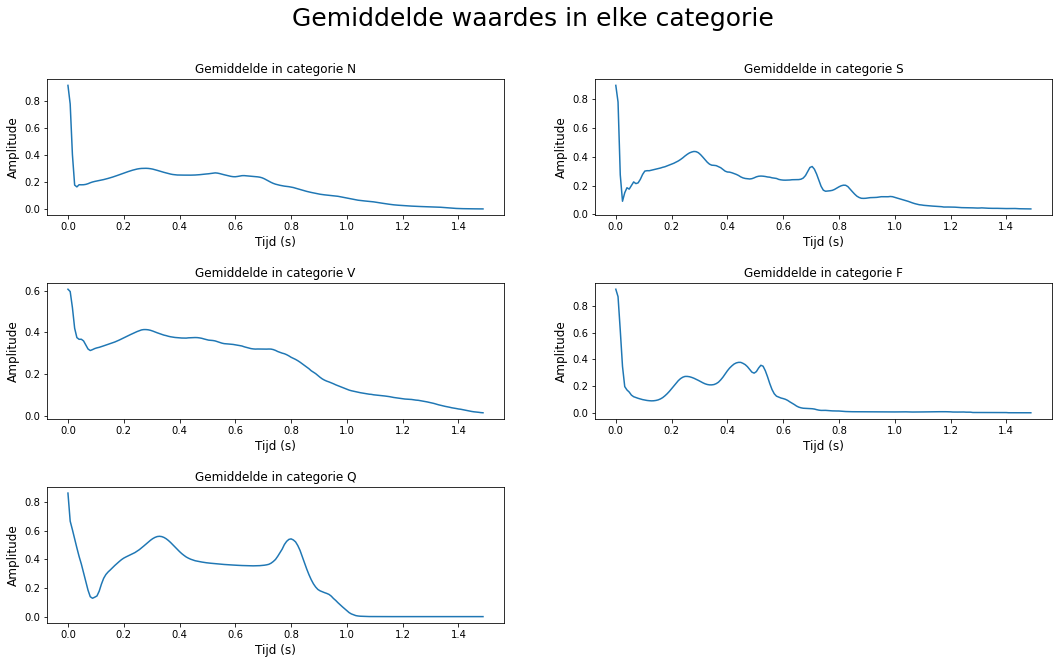

In [192]:
fig, ax = plt.subplots(3, 2, figsize=(18,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
x = 0
y = 0
for i in range(0,5):
    if (x == 2):
        y += 1
        x = 0
    current_ax = ax[y,x]
    current_ax.plot(x_label,ecg_data[ecg_data[187] == i].mean()[:187])
    current_ax.set_title("Gemiddelde in categorie " + titles[i])
    current_ax.set_ylabel("Amplitude", fontsize=12)
    current_ax.set_xlabel("Tijd (s)", fontsize=12)
    x += 1
fig.delaxes(ax[2,1])
fig.suptitle('Gemiddelde waardes in elke categorie', fontsize=25)
plt.show()

Text(0, 0.5, 'Verschil in %')

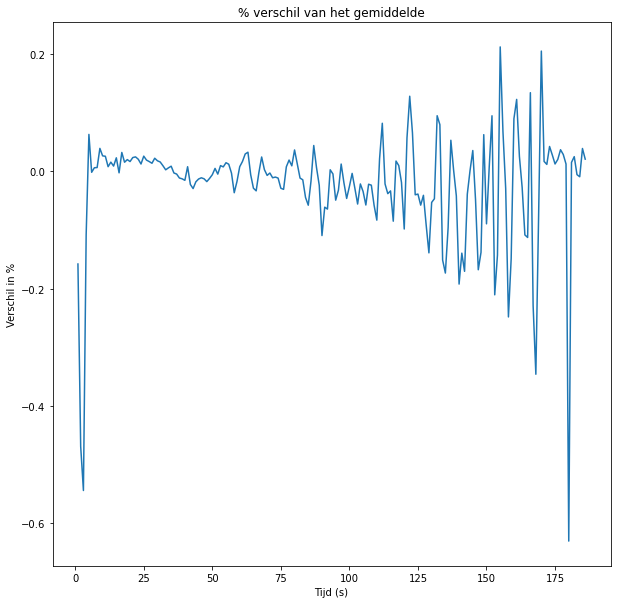

In [193]:
plt.plot(ecg_data[:187].mean()[:187].pct_change())
plt.title('% verschil van het gemiddelde')
plt.xlabel('Tijd (s)')
plt.ylabel('Verschil in %')

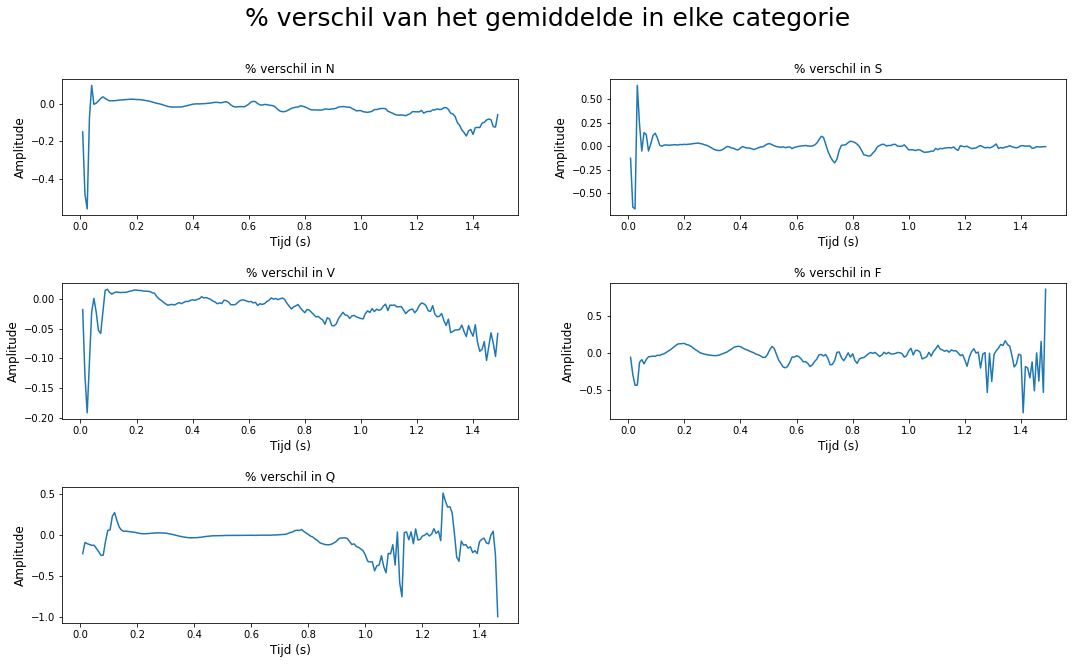

In [194]:
fig, ax = plt.subplots(3, 2, figsize=(18,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
x = 0
y = 0
for i in range(0,5):
    if (x == 2):
        y += 1
        x = 0
    current_ax = ax[y,x]
    current_ax.plot(x_label,ecg_data[ecg_data[187] == i].mean()[:187].pct_change())
    current_ax.set_title("% verschil in " + titles[i])
    current_ax.set_ylabel("Amplitude", fontsize=12)
    current_ax.set_xlabel("Tijd (s)", fontsize=12)
    x += 1
fig.delaxes(ax[2,1])
fig.suptitle('% verschil van het gemiddelde in elke categorie', fontsize=25)
plt.show()

Hieruit is op te merken dat in een slechtere categorie de waardes minder vlak zijn en meer uitschieten.

In [195]:
def plot_histogram(category,start,end,ax):
    bins = end-start
    #x_label = np.arange(start, end)*8/1000
    
    img=ecg_data[ecg_data[187]==category].values
    img=img[:,start:end]
    y=img.flatten()
    
    x=np.arange(start,end)
    for i in range(img.shape[0]-1):
        row=np.arange(start, end)
        x=np.concatenate((x, row), axis=None)
    ax.hist2d(x, y, bins=(bins,bins), cmap=plt.cm.jet)
    ax.set_title('Category ' + str(category))
    ax.set_ylabel("Amplitude", fontsize=15)
    ax.set_xlabel("Kolom", fontsize=15)
    

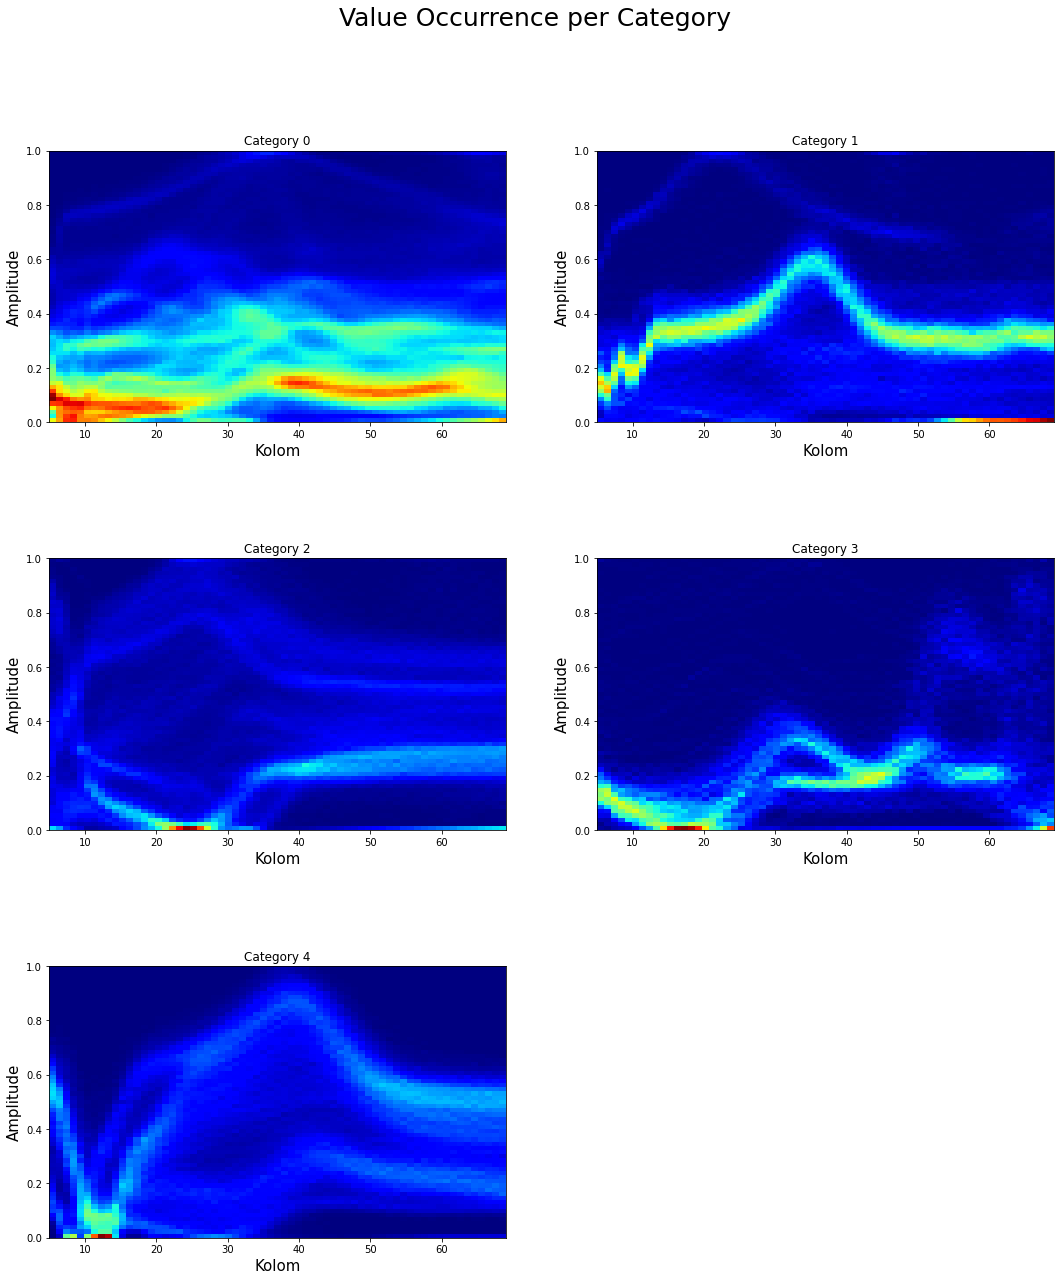

In [196]:
fig, ax = plt.subplots(3, 2, figsize=(18,20))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
x = 0
y = 0

params = [5,70,5,70,5,70,5,70,5,70]
for i in range(0,5):
    if (x == 2):
        y += 1
        x = 0
    plot_histogram(i,params[i*2],params[i*2+1],ax[y,x])
    #.plot(ecg1_train[ecg1_train[187] == i].iloc[2][:187])
    #ax[y,x].set_title("Waarde histogram van categorie " + titles[i])
    x += 1
fig.delaxes(ax[2,1])
fig.suptitle('Value Occurrence per Category', fontsize=25)
plt.show()

# Data Preparation

Hierbij gaan we er eerst voor zorgen dat de data bestaat uit evenveel rijen van elke categorie. De eerste manier is door te resamplen.

### Manier 1 Upsampling

In [70]:
cat_1_data = ecg_data[ecg_data[187] == 0]
cat_2_data = ecg_data[ecg_data[187] == 1]
cat_3_data = ecg_data[ecg_data[187] == 2]
cat_4_data = ecg_data[ecg_data[187] == 3]
cat_5_data = ecg_data[ecg_data[187] == 4]

In [71]:
from sklearn.utils import resample

C1 = cat_1_data.sample(n=20000,random_state=42)
C2 = resample(cat_2_data,replace=True,n_samples=20000,random_state=43)
C3 = resample(cat_3_data,replace=True,n_samples=20000,random_state=44)
C4 = resample(cat_4_data,replace=True,n_samples=20000,random_state=45)
C5 = resample(cat_5_data,replace=True,n_samples=20000,random_state=46)

In [72]:
ecg_data_u = pd.concat([C1,C2,C3,C4,C5])
ecg_data_u[187].value_counts()

0.0    20000
1.0    20000
2.0    20000
3.0    20000
4.0    20000
Name: 187, dtype: int64

In [73]:
values = ecg_data_u.values
ecg_train_u = values[:, :-1]
ecg_label_u = values[:, -1].astype(int)

ecg_train_u = np.expand_dims(ecg_train_u, 2)

ohe = OneHotEncoder()
ecg_label_u = ohe.fit_transform(ecg_label_u.reshape(-1,1)).todense()

data_train_u, data_test_u, label_train_u, label_test_u = train_test_split(ecg_train_u, ecg_label_u, random_state=42, test_size=0.3)

NN_data_train_u, NN_val_data_train_u, NN_label_train_u, NN_val_label_train_u = train_test_split(data_train_u, label_train_u, random_state=42, test_size=0.5)

### Manier 2 Gelijke verdeling in test data

In [74]:
C1 = cat_1_data.sample(n=300,random_state=42)
C2 = cat_2_data.sample(n=300,random_state=43)
C3 = cat_3_data.sample(n=300,random_state=44)
C4 = cat_4_data.sample(n=300,random_state=45)
C5 = cat_5_data.sample(n=300,random_state=46)
data_test_t = pd.concat([C1,C2,C3,C4,C5])
data_train_t = pd.concat([ecg_data, data_test_t, data_test_t]).drop_duplicates(keep=False)



values = data_test_t.values
data_test_t = values[:, :-1]
label_test_t = values[:, -1].astype(int)

values = data_train_t.values
data_train_t = values[:, :-1]
label_train_t = values[:, -1].astype(int)

data_test_t = np.expand_dims(data_test_t, 2)
data_train_t = np.expand_dims(data_train_t, 2)

ohe = OneHotEncoder()
label_test_t = ohe.fit_transform(label_test_t.reshape(-1,1)).todense()
label_train_t = ohe.transform(label_train_t.reshape(-1,1)).todense()

NN_data_train_t, NN_val_data_train_t, NN_label_train_t, NN_val_label_train_t = train_test_split(data_train_t, label_train_t, random_state=42, test_size=0.5)

### Manier 3 Downsampling

In [75]:
C1 = cat_1_data.sample(n=800,random_state=42)
C2 = cat_2_data.sample(n=800,random_state=43)
C3 = cat_3_data.sample(n=800,random_state=44)
C4 = cat_4_data.sample(n=800,random_state=45)
C5 = cat_5_data.sample(n=800,random_state=46)

In [76]:
ecg_data_d = pd.concat([C1,C2,C3,C4,C5])
ecg_data_d[187].value_counts()

0.0    800
1.0    800
2.0    800
3.0    800
4.0    800
Name: 187, dtype: int64

In [77]:
values = ecg_data_d.values
ecg_train_d = values[:, :-1]
ecg_label_d = values[:, -1].astype(int)

ecg_train_d = np.expand_dims(ecg_train_d, 2)

ohe = OneHotEncoder()
ecg_label_d = ohe.fit_transform(ecg_label_d.reshape(-1,1)).todense()

data_train_d, data_test_d, label_train_d, label_test_d = train_test_split(ecg_train_d, ecg_label_d, random_state=42, test_size=0.3)

NN_data_train_d, NN_val_data_train_d, NN_label_train_d, NN_val_label_train_d = train_test_split(data_train_d, label_train_d, random_state=42, test_size=0.5)

### Manier 4 Class weights

In [7]:
class_weights = {0 : 1., 1 : 11.2,2 : 12.5, 3 : 32.6, 4 : 112.8}
class_weights_eq = {0 : 1., 1 : 1,2 : 1, 3 : 1, 4 : 1}

### Normale Data

In [8]:
values = ecg_data.values
data_n = values[:, :-1]
label_n = values[:, -1].astype(int)

data_n = np.expand_dims(data_n, 2)

ohe = OneHotEncoder()
label_n = ohe.fit_transform(label_n.reshape(-1,1)).todense()

data_train_n, data_test_n, label_train_n, label_test_n = train_test_split(data_n, label_n, random_state=42, test_size=0.3)
NN_data_train_n, NN_val_data_train_n, NN_label_train_n, NN_val_label_train_n = train_test_split(data_train_n, label_train_n, random_state=42, test_size=0.5)

In [170]:
len(ecg_data)

109446

## Enkele ECG Opsplitsen en transformeren voor model

In [214]:
def flatten(something):
    if isinstance(something, (list, tuple, set, range)):
        for sub in something:
            yield from flatten(sub)
    else:
        yield something
        
def ScaleRowDown(row):
    new_row = []
    for point in range(187):
        new_row.append((row[point*2]+row[point*2+1])/2)
    return new_row

def ScaleDfDown(df):
    new_df = []
    for row in df:
        new_df.append(ScaleRowDown(row))
    return new_df

def GetIIChannel(df, plotAll = True):
    peak = [1 if x > 510 else 0 for x in (df['II']-df['II'].min())]

    counter = 0
    indices = []
    index = 0

    previous = 0
    beats = []

    for row in peak:
        index = index + 1
        counter = counter + 1
        if (row == 1):
            if (counter > 100):
                counter=0
        if (counter == 0):
            beats.append(two.iloc[previous:index])
            previous = index

    beats.append(two.iloc[previous:])

    beats_df = []
    for row in beats:
        beats_df.append((np.lib.pad(row, ((0,374-len(row))), 'constant', constant_values=(0))).tolist())

    new_final = []
    for df_row in ScaleDfDown(beats_df):
        scaler = preprocessing.MinMaxScaler()
        row=scaler.fit_transform(np.array(df_row).reshape(-1,1))  
        
        r = []
        for val in row:
            r.append(val[0])
        new_final.append(r)
        if (plotAll):
            plt.plot(row)
    if (plotAll == False):
        plt.plot(new_final[0])
    
    df_out = pd.DataFrame(new_final).values
    df_out = np.expand_dims(df_out, 2)
    
    return df_out

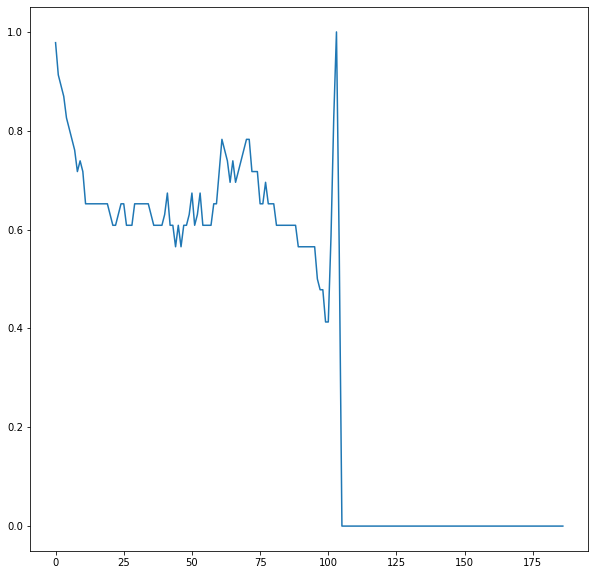

In [215]:
df_testing = GetIIChannel(whole_ecg, plotAll = False)

# Modeling

In [14]:
def GetModel(data_shape):
    _, feature, depth = data_shape.shape
    
    inp = Input(shape=(feature, depth))
    first = Conv1D(32, 5)(inp)

    layers = Conv1D(32, 5, padding='same', activation="relu")(first)
    layers = Conv1D(32, 5, padding='same')(layers)
    layers = Add()([layers, first])
    # Residual Block
    layers = Activation("relu")(layers)
    layers = MaxPooling1D(5, 2)(layers)

    layers = Flatten()(layers)

    layers = Dense(32, "relu")(layers)
    layers = Dense(32)(layers)
    layers = Dense(5, "softmax")(layers)

    model = Model(inputs=inp, outputs=layers)
    return model

def PlotHistory(history):
    history_dict = history.history
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]
    epochs = range(1, len(loss_values) + 1)
    loss_diff = np.abs(np.array(loss_values) - np.array(val_loss_values))
    plt.plot(epochs, loss_values, "bo", label="Training loss")
    plt.plot(epochs, val_loss_values, "b", label="Validation loss")
    plt.plot(epochs, loss_diff, "r", label="Difference")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    plt.clf()

    acc = history_dict["accuracy"]
    val_acc = history_dict["val_accuracy"]
    acc_diff = np.abs(np.array(acc) - np.array(val_acc))
    plt.plot(epochs, acc, "bo", label="Training acc")
    plt.plot(epochs, val_acc, "b", label="Validation acc")
    plt.plot(epochs, acc_diff, "r", label="Difference")
    plt.title("Training and validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

In [5]:
   
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def GenerateAndTrainModel(data_train, label_train, val_data_train, val_label_train, label_test, data_test, epochs, weights):
    model = GetModel(data_train)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    callbacks = [ModelCheckpoint(filepath='best_ecg.h5', monitor='val_accuracy', save_best_only=True)]
    
    history = model.fit(data_train, label_train, 
                    epochs=epochs, 
                    batch_size=500,verbose=2, validation_data=(val_data_train,val_label_train), class_weight=class_weights)
    PlotHistory(history)
    prediction = model.predict(data_train)
    cnf_matrix = confusion_matrix(label_train.argmax(axis=1), prediction.argmax(axis=1))
    
    total = cnf_matrix[0,0] + cnf_matrix[1,1] + cnf_matrix[2,2] + cnf_matrix[3,3] + cnf_matrix[4,4] 
    percent = round(total / len(label_train),3)
    print(str(percent) + "% is correct with the train data")
    print("Counts: correct = " + str(total) + " total = " + str(len(label_train)))
    
    prediction = model.predict(data_test)
    cnf_matrix = confusion_matrix(label_test.argmax(axis=1), prediction.argmax(axis=1))
    
    total = cnf_matrix[0,0] + cnf_matrix[1,1] + cnf_matrix[2,2] + cnf_matrix[3,3] + cnf_matrix[4,4] 
    percent = round(total / len(label_test),3)
    print(str(percent) + "% is correct with the test data")
    print("Counts: correct = " + str(total) + " total = " + str(len(label_test)))
    
    np.set_printoptions(precision=2)

    plt.figure(figsize=(10, 10))
    plot_confusion_matrix(cnf_matrix, normalize=False, classes=['N', 'S', 'V', 'F', 'Q'],
                          title='Confusion matrix, without normalization')
    plt.show()
    return model

def TestSavedModel(file, data_train, label_train, label_test, data_test):
    model = keras.models.load_model(file)
    prediction = model.predict(data_train)
    cnf_matrix = confusion_matrix(label_train.argmax(axis=1), prediction.argmax(axis=1))
    
    total = cnf_matrix[0,0] + cnf_matrix[1,1] + cnf_matrix[2,2] + cnf_matrix[3,3] + cnf_matrix[4,4] 
    percent = round(total / len(label_train),3)
    print(str(round(percent*100,2)) + "% is correct with the train data")
    print("Counts: correct = " + str(total) + " total = " + str(len(label_train)))
    
    prediction = model.predict(data_test)
    cnf_matrix = confusion_matrix(label_test.argmax(axis=1), prediction.argmax(axis=1))
    
    total = cnf_matrix[0,0] + cnf_matrix[1,1] + cnf_matrix[2,2] + cnf_matrix[3,3] + cnf_matrix[4,4] 
    percent = round(total / len(label_test),3)
    print(str(round(percent*100,2)) + "% is correct with the test data")
    print("Counts: correct = " + str(total) + " total = " + str(len(label_test)))
    error = cnf_matrix[0,1:].sum() + cnf_matrix[1,2:].sum() + cnf_matrix[2,3:].sum() + cnf_matrix[3,4:].sum()
    print("Type 1 error: " + str(round(error / len(label_test)*100,2)) + "%")
    print("")
    np.set_printoptions(precision=2)

    plt.figure(figsize=(10, 10))
    plot_confusion_matrix(cnf_matrix, normalize=False, classes=['N', 'S', 'V', 'F', 'Q'],
                          title='Confusion matrix, without normalization')
    plt.show()

### Manier 1 Upsampling

In [158]:
GenerateAndTrainModel(NN_data_train_u,NN_label_train_u,NN_val_data_train_u,NN_val_label_train_u,label_test_u,data_test_u,13,class_weights_eq)

Epoch 1/25


KeyboardInterrupt: 

### Manier 2 Gelijke verdeling in testdata

Epoch 1/15
108/108 - 9s - loss: 0.4437 - accuracy: 0.8819 - val_loss: 0.2483 - val_accuracy: 0.9274 - 9s/epoch - 84ms/step
Epoch 2/15
108/108 - 9s - loss: 0.2134 - accuracy: 0.9383 - val_loss: 0.1868 - val_accuracy: 0.9474 - 9s/epoch - 83ms/step
Epoch 3/15
108/108 - 9s - loss: 0.1693 - accuracy: 0.9516 - val_loss: 0.1608 - val_accuracy: 0.9538 - 9s/epoch - 84ms/step
Epoch 4/15
108/108 - 9s - loss: 0.1385 - accuracy: 0.9607 - val_loss: 0.1316 - val_accuracy: 0.9645 - 9s/epoch - 80ms/step
Epoch 5/15
108/108 - 8s - loss: 0.1156 - accuracy: 0.9671 - val_loss: 0.1090 - val_accuracy: 0.9708 - 8s/epoch - 77ms/step
Epoch 6/15
108/108 - 9s - loss: 0.1000 - accuracy: 0.9721 - val_loss: 0.1041 - val_accuracy: 0.9706 - 9s/epoch - 79ms/step
Epoch 7/15
108/108 - 9s - loss: 0.0922 - accuracy: 0.9744 - val_loss: 0.0912 - val_accuracy: 0.9751 - 9s/epoch - 80ms/step
Epoch 8/15
108/108 - 8s - loss: 0.0839 - accuracy: 0.9765 - val_loss: 0.0894 - val_accuracy: 0.9745 - 8s/epoch - 78ms/step
Epoch 9/15
108/1

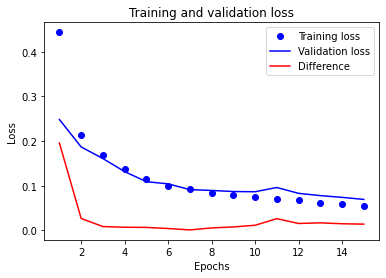

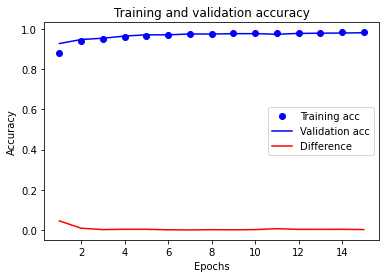

0.987% is correct with the train data
Counts: correct = 53246 total = 53973
0.837% is correct with the test data
Counts: correct = 1255 total = 1500
Confusion matrix, without normalization


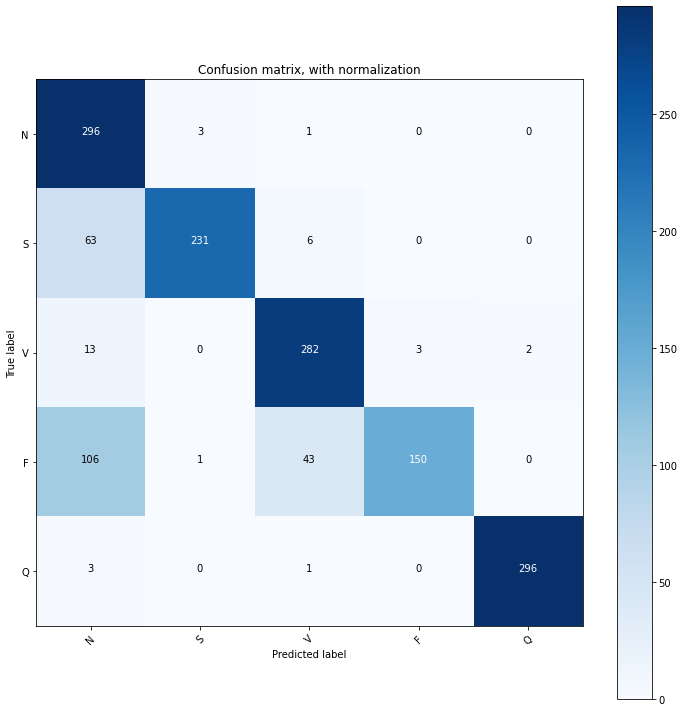

In [125]:
GenerateAndTrainModel(NN_data_train_t,NN_label_train_t,NN_val_data_train_t,NN_val_label_train_t,label_test_t,data_test_t,15,class_weights_eq)

### Manier 3 Downsampling

Epoch 1/10
3/3 - 1s - loss: 1.5879 - accuracy: 0.2307 - val_loss: 1.5051 - val_accuracy: 0.3864 - 627ms/epoch - 209ms/step
Epoch 2/10
3/3 - 0s - loss: 1.4621 - accuracy: 0.4329 - val_loss: 1.3496 - val_accuracy: 0.5943 - 225ms/epoch - 75ms/step
Epoch 3/10
3/3 - 0s - loss: 1.2928 - accuracy: 0.6000 - val_loss: 1.1655 - val_accuracy: 0.6107 - 259ms/epoch - 86ms/step
Epoch 4/10
3/3 - 0s - loss: 1.1073 - accuracy: 0.6221 - val_loss: 1.0101 - val_accuracy: 0.6436 - 257ms/epoch - 86ms/step
Epoch 5/10
3/3 - 0s - loss: 0.9812 - accuracy: 0.6314 - val_loss: 0.9418 - val_accuracy: 0.6536 - 224ms/epoch - 75ms/step
Epoch 6/10
3/3 - 0s - loss: 0.9122 - accuracy: 0.6557 - val_loss: 0.9206 - val_accuracy: 0.6714 - 229ms/epoch - 76ms/step
Epoch 7/10
3/3 - 0s - loss: 0.8722 - accuracy: 0.6800 - val_loss: 0.8611 - val_accuracy: 0.6843 - 235ms/epoch - 78ms/step
Epoch 8/10
3/3 - 0s - loss: 0.8173 - accuracy: 0.6979 - val_loss: 0.8344 - val_accuracy: 0.7200 - 230ms/epoch - 77ms/step
Epoch 9/10
3/3 - 0s - l

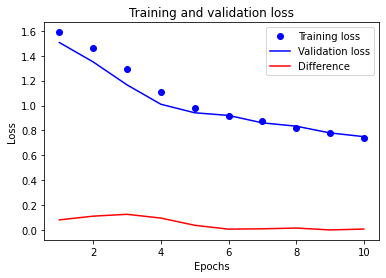

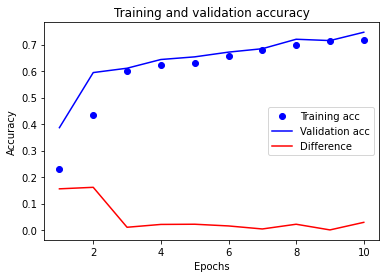

0.752% is correct with the train data
Counts: correct = 1053 total = 1400
0.712% is correct with the test data
Counts: correct = 855 total = 1200
Confusion matrix, without normalization


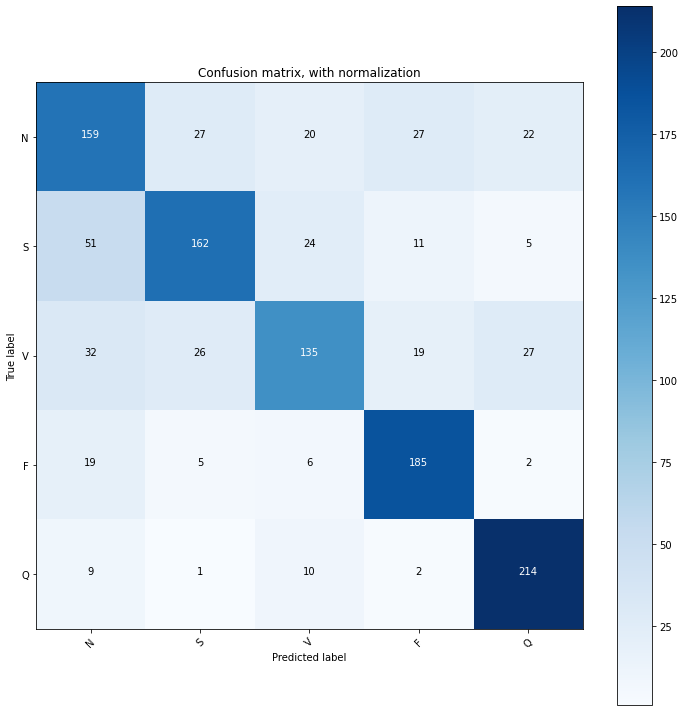

In [124]:
model = GenerateAndTrainModel(NN_data_train_d,NN_label_train_d,NN_val_data_train_d,NN_val_label_train_d,label_test_d,data_test_d,10,class_weights_eq)

### Manier 4 Class Weights

Epoch 1/100
77/77 - 8s - loss: 5.2224 - accuracy: 0.4434 - val_loss: 0.5957 - val_accuracy: 0.8076 - 8s/epoch - 107ms/step
Epoch 2/100
77/77 - 8s - loss: 2.4907 - accuracy: 0.7533 - val_loss: 0.6158 - val_accuracy: 0.7987 - 8s/epoch - 100ms/step
Epoch 3/100
77/77 - 8s - loss: 1.8609 - accuracy: 0.8084 - val_loss: 0.4739 - val_accuracy: 0.8508 - 8s/epoch - 102ms/step
Epoch 4/100
77/77 - 8s - loss: 1.5395 - accuracy: 0.8422 - val_loss: 0.4798 - val_accuracy: 0.8574 - 8s/epoch - 107ms/step
Epoch 5/100
77/77 - 9s - loss: 1.3120 - accuracy: 0.8622 - val_loss: 0.5019 - val_accuracy: 0.8310 - 9s/epoch - 111ms/step
Epoch 6/100
77/77 - 8s - loss: 1.1825 - accuracy: 0.8777 - val_loss: 0.4519 - val_accuracy: 0.8638 - 8s/epoch - 110ms/step
Epoch 7/100
77/77 - 8s - loss: 1.0153 - accuracy: 0.8880 - val_loss: 0.2755 - val_accuracy: 0.9190 - 8s/epoch - 107ms/step
Epoch 8/100
77/77 - 8s - loss: 0.9143 - accuracy: 0.8998 - val_loss: 0.4511 - val_accuracy: 0.8489 - 8s/epoch - 108ms/step
Epoch 9/100
77/7

Epoch 68/100
77/77 - 8s - loss: 0.0527 - accuracy: 0.9920 - val_loss: 0.1363 - val_accuracy: 0.9749 - 8s/epoch - 105ms/step
Epoch 69/100
77/77 - 8s - loss: 0.0514 - accuracy: 0.9924 - val_loss: 0.1430 - val_accuracy: 0.9739 - 8s/epoch - 107ms/step
Epoch 70/100
77/77 - 8s - loss: 0.1117 - accuracy: 0.9854 - val_loss: 0.1478 - val_accuracy: 0.9718 - 8s/epoch - 108ms/step
Epoch 71/100
77/77 - 8s - loss: 0.0733 - accuracy: 0.9902 - val_loss: 0.1461 - val_accuracy: 0.9740 - 8s/epoch - 109ms/step
Epoch 72/100
77/77 - 8s - loss: 0.0736 - accuracy: 0.9905 - val_loss: 0.1369 - val_accuracy: 0.9726 - 8s/epoch - 108ms/step
Epoch 73/100
77/77 - 8s - loss: 0.0527 - accuracy: 0.9926 - val_loss: 0.1339 - val_accuracy: 0.9742 - 8s/epoch - 108ms/step
Epoch 74/100
77/77 - 9s - loss: 0.0518 - accuracy: 0.9921 - val_loss: 0.1382 - val_accuracy: 0.9736 - 9s/epoch - 110ms/step
Epoch 75/100
77/77 - 8s - loss: 0.0441 - accuracy: 0.9942 - val_loss: 0.1384 - val_accuracy: 0.9753 - 8s/epoch - 109ms/step
Epoch 76

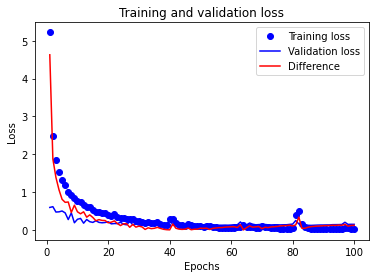

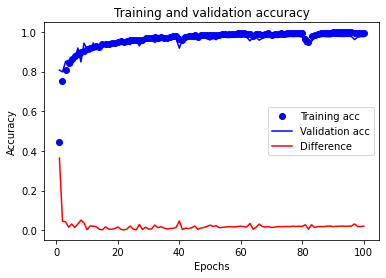

0.997% is correct with the train data
Counts: correct = 38208 total = 38306
0.976% is correct with the test data
Counts: correct = 32054 total = 32834
Confusion matrix, without normalization


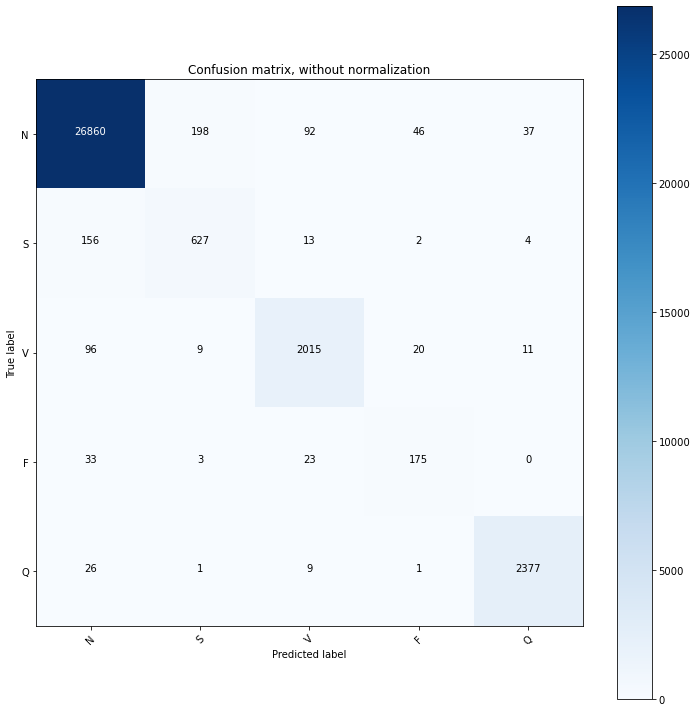

In [16]:
model = GenerateAndTrainModel(NN_data_train_n,NN_label_train_n,NN_val_data_train_n,NN_val_label_train_n,label_test_n,data_test_n,100,class_weights)

### Conclusie

Om het model niet overfit te laten trainen op de data en we zo veel mogelijk willen gebruiken ervan, is manier 4 de beste manier. Hiermee zorgen we ervoor dat elke categorie een gelijk aandeel levert, ook al is het niet gelijk verdeeld. 
Met deze manier kunnen we een model krijgen die 97,4% accuraat is op test data en 98,9% op de train data. De type 1 error hiervan is 1.6%.

98.9% is correct with the train data
Counts: correct = 37883 total = 38306
97.4% is correct with the test data
Counts: correct = 31967 total = 32834
Type 1 error: 1.6%

Confusion matrix, without normalization


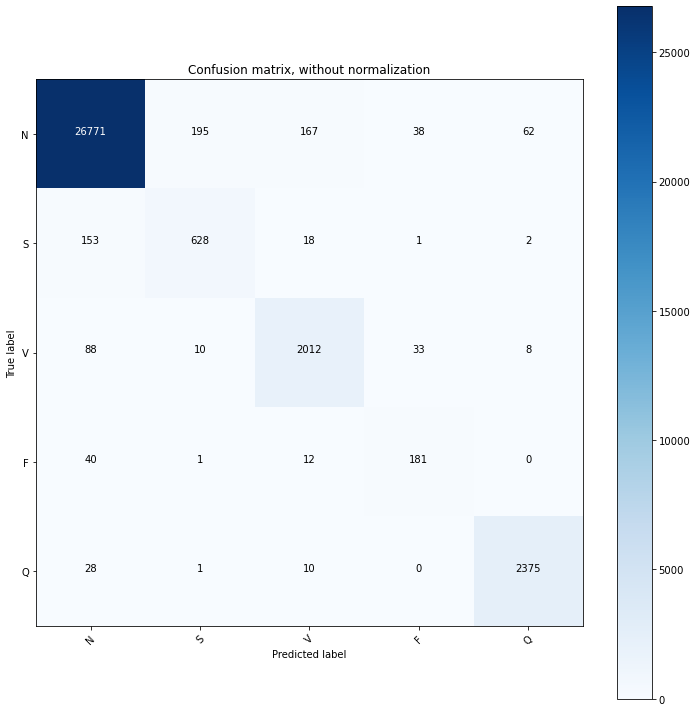

In [219]:
TestSavedModel("best_ecg.h5", NN_data_train_n,NN_label_train_n,label_test_n,data_test_n)

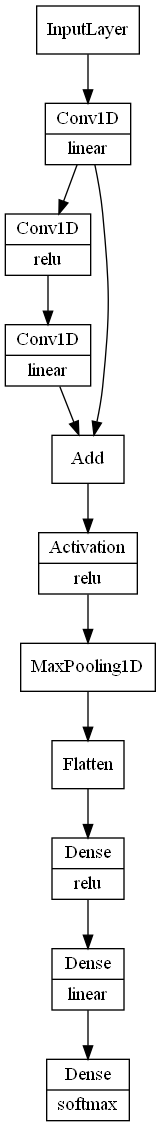

In [21]:
plot_model(model, to_file='ECG_model.png',show_layer_names=False, show_layer_activations=True)

## ECG Prediction

In [224]:
def ClassPropability(counts):
    print("Certainty per class this ECG is classified in:")
    print("N:" + str(round(counts[0]/counts.sum()*100,2)) + "%")
    print("S:" + str(round(counts[1]/counts.sum()*100,2)) + "%")
    print("V:" + str(round(counts[2]/counts.sum()*100,2)) + "%")
    print("F:" + str(round(counts[3]/counts.sum()*100,2)) + "%")
    print("Q:" + str(round(counts[4]/counts.sum()*100,2)) + "%")
    

In [209]:
best_model = keras.models.load_model('best_ecg.h5')

In [226]:
cat_labels = {0:'N',1:'S',2:'V',3:'F',4:'Q'}
prediction = best_model.predict(df_testing)
prediction.argmax(axis=1)
counts = np.bincount(prediction.argmax(axis=1))
ClassPropability(counts)
print("The ECG has the " + cat_labels[np.argmax(counts)] + " category (category " + str(np.argmax(counts)) + ")")

Certainty per class this ECG is classified in:
N:12.5%
S:0.0%
V:81.25%
F:0.0%
Q:6.25%
The ECG has the V category (category 2)


N - 0
* Normal
* Left/Right bundle branch block
* Atrial escape
* Nodal escape</br>

S - 1
* Atrial premature
* Aberrant atrial premature
* Nodal premature
* Supra-ventricular premature</br>

V - 2
* Premature ventricular contraction
* Ventricular escape</br>

F - 3
* Fusion of ventricular and normal</br>

Q - 4
* Paced
* Fusion of paced and normal
* Unclassifiable